### Import Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import plot_tree

import pickle
import json
import requests

### Download Data

In [15]:
## Data can be downloaded with the command
!wget https://raw.githubusercontent.com/danietakeshi/ml-zoomcamp-capstone-project-1/main/data/BankChurners.csv

--2023-12-15 11:45:42--  https://raw.githubusercontent.com/danietakeshi/ml-zoomcamp-capstone-project-1/main/data/BankChurners.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1510880 (1,4M) [text/plain]
Saving to: 'BankChurners.csv'

     0K .......... .......... .......... .......... ..........  3% 5,91M 0s
    50K .......... .......... .......... .......... ..........  6%  241M 0s
   100K .......... .......... .......... .......... .......... 10% 24,9M 0s
   150K .......... .......... .......... .......... .......... 13% 16,2M 0s
   200K .......... .......... .......... .......... .......... 16% 46,6M 0s
   250K .......... .......... .......... .......... .......... 20% 24,9M 0s
   300K .......... .......... .......... .......... .......... 23% 9,14M 0s

In [16]:
df = pd.read_csv('../data/BankChurners.csv') ## Change the directory if necessary

In [17]:
df.columns = df.columns.str.lower()

In [18]:
df

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [6]:
df.iloc[0].T

clientnum                                                                                                                                     768805383
attrition_flag                                                                                                                        Existing Customer
customer_age                                                                                                                                         45
gender                                                                                                                                                M
dependent_count                                                                                                                                       3
education_level                                                                                                                             High School
marital_status                                                                          

In [7]:
df.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Exploratory data analysis (EDA)
- Checking for null values
- Getting number of unique values per column

In [8]:
df.isnull().sum()

clientnum                                                                                                                             0
attrition_flag                                                                                                                        0
customer_age                                                                                                                          0
gender                                                                                                                                0
dependent_count                                                                                                                       0
education_level                                                                                                                       0
marital_status                                                                                                                        0
income_category                                 

In [9]:
df.nunique()

clientnum                                                                                                                             10127
attrition_flag                                                                                                                            2
customer_age                                                                                                                             45
gender                                                                                                                                    2
dependent_count                                                                                                                           6
education_level                                                                                                                           7
marital_status                                                                                                                            4
income_category     

In [10]:
df.describe()

,clientnum,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])  # Display the first 5 unique values
    print(df[col].nunique())    # Display the number of unique values
    print()

clientnum
[768805383 818770008 713982108 769911858 709106358]
10127

attrition_flag
['Existing Customer' 'Attrited Customer']
2

customer_age
[45 49 51 40 44]
45

gender
['M' 'F']
2

dependent_count
[3 5 4 2 0]
6

education_level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College']
7

marital_status
['Married' 'Single' 'Unknown' 'Divorced']
4

income_category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
6

card_category
['Blue' 'Gold' 'Silver' 'Platinum']
4

months_on_book
[39 44 36 34 21]
44

total_relationship_count
[5 6 4 3 2]
6

months_inactive_12_mon
[1 4 2 3 6]
7

contacts_count_12_mon
[3 2 0 1 4]
7

credit_limit
[12691.  8256.  3418.  3313.  4716.]
6205

total_revolving_bal
[ 777  864    0 2517 1247]
1974

avg_open_to_buy
[11914.  7392.  3418.   796.  4716.]
6813

total_amt_chng_q4_q1
[1.335 1.541 2.594 1.405 2.175]
1158

total_trans_amt
[1144 1291 1887 1171  816]
5033

total_trans_ct
[42 33 20 28 24]
126

total_ct_chng_q4_q1
[1.625 3.714 2.333 

(array([1.390e+02, 1.260e+02, 3.240e+02, 3.300e+02, 4.810e+02, 9.970e+02,
        8.050e+02, 9.730e+02, 1.455e+03, 9.670e+02, 8.500e+02, 1.070e+03,
        5.410e+02, 3.800e+02, 3.770e+02, 1.580e+02, 1.440e+02, 8.000e+00,
        1.000e+00, 1.000e+00]),
 array([26.  , 28.35, 30.7 , 33.05, 35.4 , 37.75, 40.1 , 42.45, 44.8 ,
        47.15, 49.5 , 51.85, 54.2 , 56.55, 58.9 , 61.25, 63.6 , 65.95,
        68.3 , 70.65, 73.  ]),
 <BarContainer object of 20 artists>)

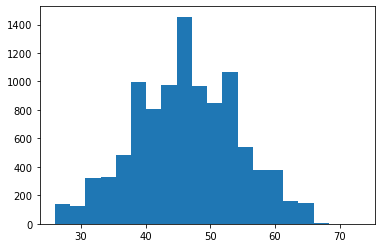

In [12]:
plt.hist(df.customer_age, bins=20)

(array([4687.,    0.,    0.,    0.,    0.,    0., 3943.,    0.,    0.,
           0.,    0.,    0.,    0.,  749.,    0.,    0.,    0.,    0.,
           0.,  748.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <BarContainer object of 20 artists>)

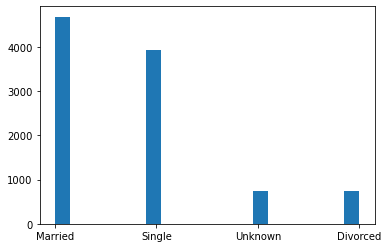

In [13]:
plt.hist(df.marital_status, bins=20)

(array([4769.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 5358.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

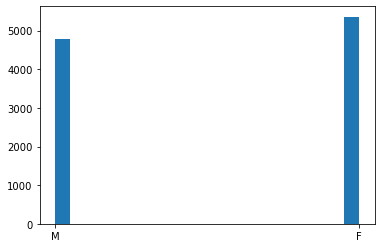

In [14]:
plt.hist(df.gender, bins=20)

In [15]:
column_filter = df.dtypes.index[df.dtypes.values != 'object'].values

column_filter

array(['clientnum', 'customer_age', 'dependent_count', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1',
       'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2'],
      dtype=object)

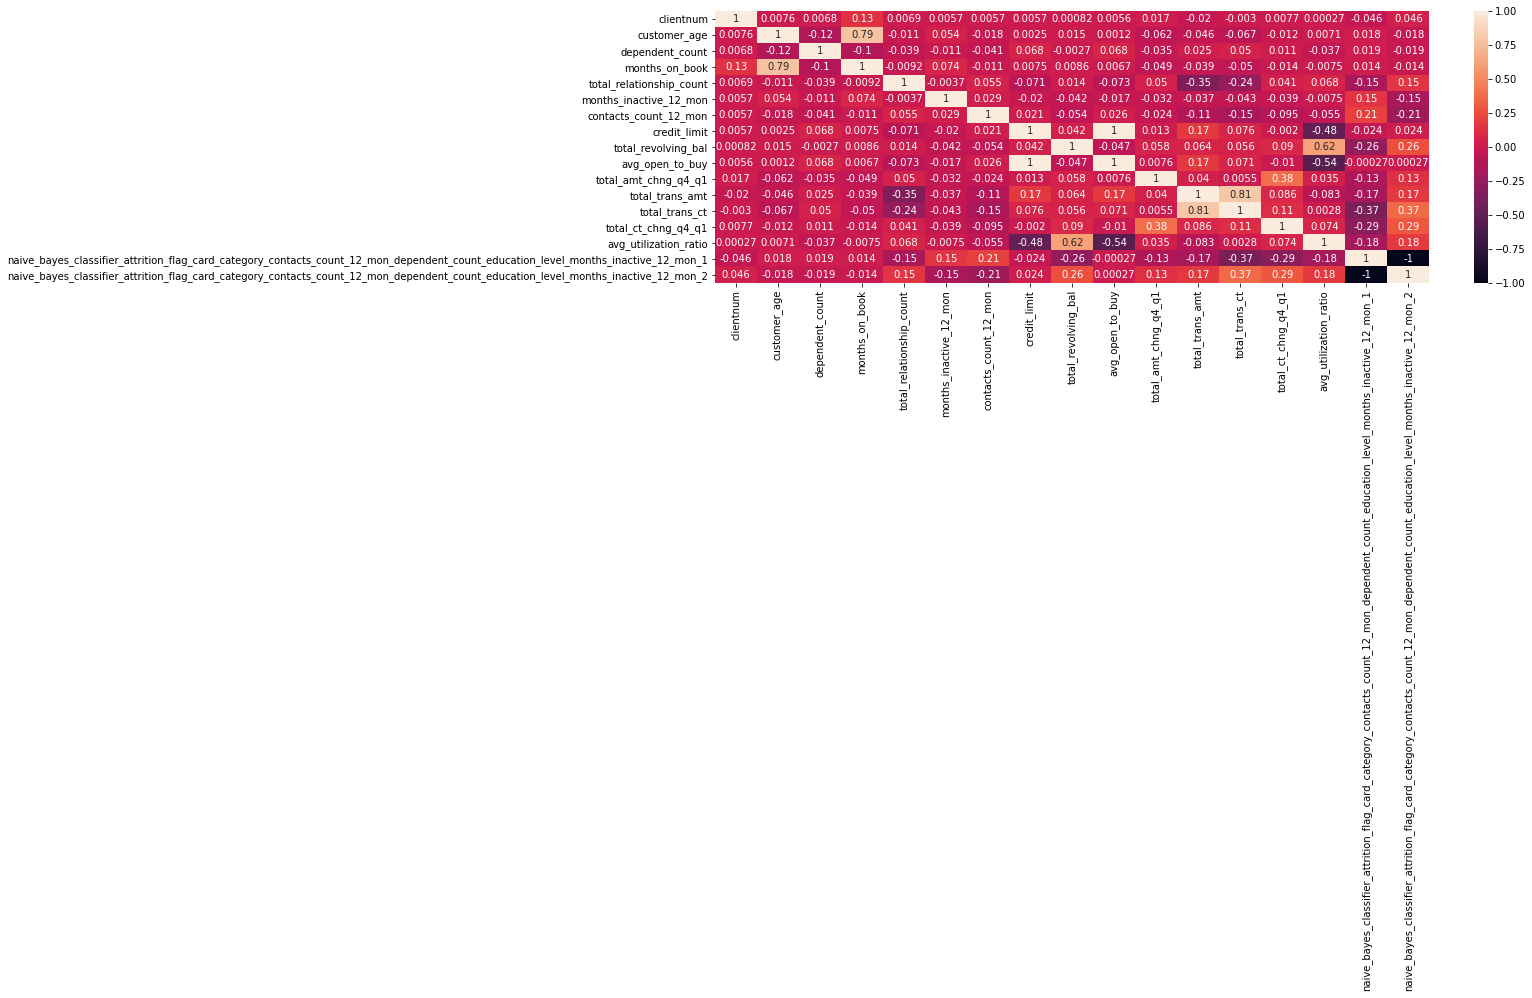

In [16]:
corr_matrix = df[column_filter].corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Dropping some columns from the Data

In [17]:
for column in column_filter:
    if '_ct' in column or 'avg' in column or 'naive_bayes_' in column:
        df = df.drop(columns=[column])
df

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,0.703,15476
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,0.804,8764
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,0.819,10291
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,0.535,8395


Changing the target column 'attrition_flag' to binary

In [18]:
df.attrition_flag = (df.attrition_flag == 'Attrited Customer').astype(int)

Splitting the dataset

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
df_full_train

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt
9066,713071383,0,54,F,1,Unknown,Single,Unknown,Blue,36,1,3,3,3723.0,1728,0.595,8554
5814,714246333,1,58,F,4,High School,Married,Unknown,Blue,48,1,4,3,5396.0,1803,0.493,2107
792,718206783,0,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,0.732,1436
1791,721096983,0,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1.158,2616
5011,720028683,0,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,0.602,3806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,769053033,1,44,F,1,Graduate,Single,$40K - $60K,Blue,38,3,2,5,4142.0,2517,0.809,2104
5191,714406158,1,53,F,3,High School,Divorced,Unknown,Blue,36,4,3,6,7939.0,0,0.551,2269
5390,714140133,0,42,F,4,Graduate,Unknown,Less than $40K,Blue,32,3,1,2,2314.0,1547,0.804,4678
860,720244983,0,40,M,3,Unknown,Single,$40K - $60K,Blue,28,4,1,1,3563.0,1707,0.506,1482


In [20]:
len(df_train), len(df_val), len(df_test)

(6075, 2026, 2026)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = df_train.attrition_flag.values
y_full_train = df_full_train.attrition_flag.values
y_val = df_val.attrition_flag.values
y_test = df_test.attrition_flag.values

Analyzing Churn per categorical variables

In [23]:
churn_female = df_full_train[df_full_train.gender == 'F'].attrition_flag.mean()
churn_female

0.17691049310586585

In [24]:
churn_male = df_full_train[df_full_train.gender == 'M'].attrition_flag.mean()
churn_male

0.14207221350078492

In [25]:
global_churn = df_full_train.attrition_flag.mean()
global_churn

0.16047401555363536

In [26]:
global_churn - churn_female

-0.01643647755223049

In [27]:
global_churn - churn_male

0.01840180205285044

In [29]:
churn_partner = df_full_train[df_full_train.marital_status == 'Married'].attrition_flag.mean()
churn_partner

0.15343774887178127

In [30]:
for status in df_full_train.marital_status.unique():
    print(f'{status}:{global_churn - df_full_train[df_full_train.marital_status == status].attrition_flag.mean()}')

Single:-0.0061926511130313
Married:0.0070362666818540864
Divorced:-0.008102089192682155
Unknown:-0.003601977537901785


In [31]:
for income in df_full_train.income_category.unique():
    print(f'{income}:{global_churn - df_full_train[df_full_train.income_category == income].attrition_flag.mean()}')

Unknown:-0.01837862786593719
Less than $40K:-0.01164547235532623
$40K - $60K:0.01181606648274755
$60K - $80K:0.024110379189999004
$80K - $120K:0.004451380145389594
$120K +:-0.0010906102967047915


In [32]:
churn_male / global_churn

0.885328462746045

In [33]:
churn_female / global_churn

1.1024245420389378

In [34]:
categorical = df.dtypes.index[df.dtypes.values == 'object'].values
categorical

array(['gender', 'education_level', 'marital_status', 'income_category',
       'card_category'], dtype=object)

In [35]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).attrition_flag.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
F,0.176910,4279,0.016436,1.102425
M,0.142072,3822,-0.018402,0.885328




education_level


,mean,count,diff,risk
education_level,,,,
College,0.139706,816,-0.020768,0.870583
Doctorate,0.228169,355,0.067695,1.421844
Graduate,0.157832,2528,-0.002642,0.983538
High School,0.153181,1619,-0.007293,0.954553
Post-Graduate,0.181818,407,0.021344,1.133007
Uneducated,0.154569,1171,-0.005905,0.963201
Unknown,0.168465,1205,0.007991,1.049794




marital_status


,mean,count,diff,risk
marital_status,,,,
Divorced,0.168576,611,0.008102,1.050488
Married,0.153438,3767,-0.007036,0.956153
Single,0.166667,3144,0.006193,1.038590
Unknown,0.164076,579,0.003602,1.022446




income_category


,mean,count,diff,risk
income_category,,,,
$120K +,0.161565,588,0.001091,1.006796
$40K - $60K,0.148658,1453,-0.011816,0.926368
$60K - $80K,0.136364,1122,-0.024110,0.849755
$80K - $120K,0.156023,1237,-0.004451,0.972261
Less than $40K,0.172119,2812,0.011645,1.072569
Unknown,0.178853,889,0.018379,1.114527




card_category


,mean,count,diff,risk
card_category,,,,
Blue,0.161307,7557,0.000833,1.005193
Gold,0.172043,93,0.011569,1.072093
Platinum,0.333333,15,0.172859,2.077179
Silver,0.137615,436,-0.022859,0.857551


In [36]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.attrition_flag)

In [37]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

gender             0.001128
education_level    0.001027
income_category    0.000723
card_category      0.000283
marital_status     0.000163
dtype: float64

In [38]:
del df_train['attrition_flag']
del df_full_train['attrition_flag']
del df_val['attrition_flag']
del df_test['attrition_flag']

In [39]:
df_train

,clientnum,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt
0,711445233,42,F,5,Uneducated,Single,Less than $40K,Blue,36,6,3,1,1438.3,0,0.813,4653
1,716378658,55,F,2,Unknown,Married,Less than $40K,Blue,36,5,2,3,2629.0,1476,0.537,1725
2,825831933,52,F,3,High School,Married,Less than $40K,Blue,48,4,2,2,3136.0,1103,0.812,4528
3,712203333,51,M,3,Graduate,Married,$80K - $120K,Blue,39,1,2,1,7088.0,1750,0.618,4691
4,719535558,47,M,4,College,Divorced,$40K - $60K,Blue,36,5,1,1,5570.0,1858,0.783,4129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6070,758331483,31,M,0,Graduate,Single,$60K - $80K,Silver,24,2,2,2,34516.0,984,0.913,15347
6071,713998233,37,F,2,High School,Single,Less than $40K,Blue,36,6,2,4,3586.0,1414,0.745,2780
6072,715191258,47,F,5,Unknown,Married,Unknown,Blue,41,1,2,3,2675.0,1999,0.679,4138
6073,827948133,47,F,3,Graduate,Single,Less than $40K,Blue,43,4,2,4,5062.0,1423,0.775,4535


### Train Models

#### Linear Regression

In [40]:
dv = DictVectorizer(sparse = False)

In [41]:
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
X_test = dv.transform(df_test.to_dict(orient='records'))

In [42]:
model = LogisticRegression(solver='lbfgs', random_state=42)

In [43]:
X_train

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 6.000e+00, 0.000e+00,
        4.653e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 1.476e+03,
        1.725e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 1.103e+03,
        4.528e+03],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.999e+03,
        4.138e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 1.423e+03,
        4.535e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 1.558e+03,
        1.660e+03]])

In [44]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [45]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.17244934, 0.17266591, 0.17250801, ..., 0.17151159, 0.15563927,
       0.17145786])

In [49]:
roc_auc_score(y_val, y_pred)

0.5709258299162621

In [50]:
roc_auc_score(y_val, np.zeros(len(y_val)))

0.5

#### Decision Tree

In [51]:
dt = DecisionTreeClassifier(max_depth=3)

In [52]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [53]:
y_pred = dt.predict(X_val)

In [54]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- total_trans_amt <= 2939.50
|   |--- total_revolving_bal <= 580.00
|   |   |--- total_relationship_count <= 2.50
|   |   |   |--- class: 1
|   |   |--- total_relationship_count >  2.50
|   |   |   |--- class: 1
|   |--- total_revolving_bal >  580.00
|   |   |--- total_relationship_count <= 2.50
|   |   |   |--- class: 1
|   |   |--- total_relationship_count >  2.50
|   |   |   |--- class: 0
|--- total_trans_amt >  2939.50
|   |--- total_trans_amt <= 5271.50
|   |   |--- contacts_count_12_mon <= 5.50
|   |   |   |--- class: 0
|   |   |--- contacts_count_12_mon >  5.50
|   |   |   |--- class: 1
|   |--- total_trans_amt >  5271.50
|   |   |--- total_revolving_bal <= 579.00
|   |   |   |--- class: 0
|   |   |--- total_revolving_bal >  579.00
|   |   |   |--- class: 0



In [55]:
roc_auc_score(y_val, y_pred)

0.7793062952663745

#### Random Forest

In [57]:
rf = RandomForestClassifier(n_estimators=1000, random_state=1, max_depth=8, n_jobs=-1)

In [58]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1,
                       random_state=1)

In [59]:
y_pred = rf.predict(X_val)

In [60]:
roc_auc_score(y_val, y_pred)

0.7380638167507187

In [61]:
feature_names=list(dv.get_feature_names_out())

In [62]:
feature_importances = list(zip(feature_names, rf.feature_importances_))

In [63]:
importance_df = pd.DataFrame(feature_importances, columns=['feature_names', 'feature_importances'])

In [64]:
importance_df = importance_df.sort_values(by='feature_importances', ascending=False)

Text(0.5, 1.0, 'Feature Importance Chart')

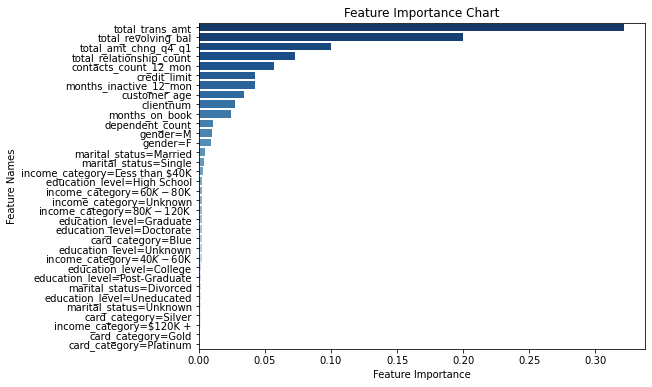

In [65]:
plt.figure(figsize=(8, 6))
sns.barplot(x='feature_importances', y='feature_names', data=importance_df, palette='Blues_r')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Chart')

#### XGBoost

In [66]:
dv = DictVectorizer(sparse = False)

In [67]:
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
X_test = dv.transform(df_test.to_dict(orient='records'))

In [68]:
features = dv.get_feature_names_out().tolist()
features

['card_category=Blue',
 'card_category=Gold',
 'card_category=Platinum',
 'card_category=Silver',
 'clientnum',
 'contacts_count_12_mon',
 'credit_limit',
 'customer_age',
 'dependent_count',
 'education_level=College',
 'education_level=Doctorate',
 'education_level=Graduate',
 'education_level=High School',
 'education_level=Post-Graduate',
 'education_level=Uneducated',
 'education_level=Unknown',
 'gender=F',
 'gender=M',
 'income_category=$120K +',
 'income_category=$40K - $60K',
 'income_category=$60K - $80K',
 'income_category=$80K - $120K',
 'income_category=Less than $40K',
 'income_category=Unknown',
 'marital_status=Divorced',
 'marital_status=Married',
 'marital_status=Single',
 'marital_status=Unknown',
 'months_inactive_12_mon',
 'months_on_book',
 'total_amt_chng_q4_q1',
 'total_relationship_count',
 'total_revolving_bal',
 'total_trans_amt']

In [69]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [70]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [71]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [72]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [73]:
scores = {}

In [74]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [75]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.31823  0.31048
 1          5    0.14341  0.16810
 2         10    0.09258  0.13694
 3         15    0.07300  0.12488
 4         20    0.06126  0.12004
 5         25    0.05246  0.11782
 6         30    0.04669  0.11582
 7         35    0.04102  0.11465
 8         40    0.03651  0.11364
 9         45    0.03147  0.11356
 10        50    0.02742  0.11272
 11        55    0.02471  0.11391
 12        60    0.02141  0.11428
 13        65    0.01929  0.11636
 14        70    0.01676  0.11742
 15        75    0.01500  0.11733
 16        80    0.01336  0.11851
 17        85    0.01222  0.11904
 18        90    0.01113  0.12048
 19        95    0.01049  0.12107
 20        99    0.00983  0.12161}

In [76]:
y_pred = model.predict(dval)

In [77]:
roc_auc_score(y_val, y_pred)

0.9816028027839312

In [78]:
scores = {}

for eta in ['0.1', '0.2', '0.3', '0.4', '0.5']:
    for max_depth in range(1, 11):
        key = f'eta={eta}-max_depth={max_depth}'
        print(key)
        xgb_params = {
            'eta': eta, 
            'max_depth': max_depth,
            'min_child_weight': 1,
            'alpha': 10,
            'lambda': 10,
            'gamma': 10,

            'objective': 'binary:logistic',
            'nthread': 8,

            'seed': 1,
            'verbosity': 1,
        }

        model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                          verbose_eval=5,
                          evals=watchlist)
        
        y_pred = model.predict(dval)
        score = roc_auc_score(y_val, y_pred)
        
        scores[key] = score

eta=0.1-max_depth=1
[0]	train-logloss:0.44210	val-logloss:0.41602
[5]	train-logloss:0.39609	val-logloss:0.37276
[10]	train-logloss:0.36774	val-logloss:0.34666
[15]	train-logloss:0.34997	val-logloss:0.33011
[20]	train-logloss:0.33682	val-logloss:0.31835
[25]	train-logloss:0.32681	val-logloss:0.30927
[30]	train-logloss:0.31876	val-logloss:0.30179
[35]	train-logloss:0.31193	val-logloss:0.29553
[40]	train-logloss:0.30591	val-logloss:0.29056
[45]	train-logloss:0.30069	val-logloss:0.28576
[50]	train-logloss:0.29602	val-logloss:0.28203
[55]	train-logloss:0.29176	val-logloss:0.27846
[60]	train-logloss:0.28792	val-logloss:0.27504
[65]	train-logloss:0.28448	val-logloss:0.27223
[70]	train-logloss:0.28110	val-logloss:0.26961
[75]	train-logloss:0.27815	val-logloss:0.26699
[80]	train-logloss:0.27526	val-logloss:0.26487
[85]	train-logloss:0.27249	val-logloss:0.26227
[90]	train-logloss:0.26983	val-logloss:0.26019
[95]	train-logloss:0.26742	val-logloss:0.25832
[99]	train-logloss:0.26553	val-logloss:0.2

[15]	train-logloss:0.23244	val-logloss:0.22907
[20]	train-logloss:0.21053	val-logloss:0.20887
[25]	train-logloss:0.19855	val-logloss:0.19854
[30]	train-logloss:0.18669	val-logloss:0.18880
[35]	train-logloss:0.17593	val-logloss:0.17991
[40]	train-logloss:0.16862	val-logloss:0.17375
[45]	train-logloss:0.16661	val-logloss:0.17233
[50]	train-logloss:0.16661	val-logloss:0.17233
[55]	train-logloss:0.16661	val-logloss:0.17233
[60]	train-logloss:0.16661	val-logloss:0.17233
[65]	train-logloss:0.16661	val-logloss:0.17233
[70]	train-logloss:0.16661	val-logloss:0.17233
[75]	train-logloss:0.16661	val-logloss:0.17233
[80]	train-logloss:0.16661	val-logloss:0.17233
[85]	train-logloss:0.16661	val-logloss:0.17233
[90]	train-logloss:0.16661	val-logloss:0.17233
[95]	train-logloss:0.16661	val-logloss:0.17233
[99]	train-logloss:0.16661	val-logloss:0.17233
eta=0.1-max_depth=10
[0]	train-logloss:0.41896	val-logloss:0.39609
[5]	train-logloss:0.31537	val-logloss:0.30308
[10]	train-logloss:0.26158	val-logloss:0.

[35]	train-logloss:0.16439	val-logloss:0.16849
[40]	train-logloss:0.16439	val-logloss:0.16849
[45]	train-logloss:0.16439	val-logloss:0.16849
[50]	train-logloss:0.16439	val-logloss:0.16849
[55]	train-logloss:0.16439	val-logloss:0.16849
[60]	train-logloss:0.16439	val-logloss:0.16849
[65]	train-logloss:0.16439	val-logloss:0.16849
[70]	train-logloss:0.16439	val-logloss:0.16849
[75]	train-logloss:0.16439	val-logloss:0.16849
[80]	train-logloss:0.16439	val-logloss:0.16849
[85]	train-logloss:0.16439	val-logloss:0.16849
[90]	train-logloss:0.16439	val-logloss:0.16849
[95]	train-logloss:0.16439	val-logloss:0.16849
[99]	train-logloss:0.16439	val-logloss:0.16849
eta=0.2-max_depth=8
[0]	train-logloss:0.38671	val-logloss:0.36810
[5]	train-logloss:0.25154	val-logloss:0.24471
[10]	train-logloss:0.20208	val-logloss:0.20062
[15]	train-logloss:0.17667	val-logloss:0.17837
[20]	train-logloss:0.16544	val-logloss:0.16924
[25]	train-logloss:0.16439	val-logloss:0.16849
[30]	train-logloss:0.16439	val-logloss:0.1

[65]	train-logloss:0.18284	val-logloss:0.18406
[70]	train-logloss:0.18284	val-logloss:0.18406
[75]	train-logloss:0.18284	val-logloss:0.18406
[80]	train-logloss:0.18284	val-logloss:0.18406
[85]	train-logloss:0.18284	val-logloss:0.18406
[90]	train-logloss:0.18284	val-logloss:0.18406
[95]	train-logloss:0.18284	val-logloss:0.18406
[99]	train-logloss:0.18284	val-logloss:0.18406
eta=0.4-max_depth=4
[0]	train-logloss:0.34779	val-logloss:0.33436
[5]	train-logloss:0.20561	val-logloss:0.20413
[10]	train-logloss:0.17121	val-logloss:0.17387
[15]	train-logloss:0.16128	val-logloss:0.16753
[20]	train-logloss:0.16128	val-logloss:0.16753
[25]	train-logloss:0.16128	val-logloss:0.16753
[30]	train-logloss:0.16128	val-logloss:0.16753
[35]	train-logloss:0.16128	val-logloss:0.16753
[40]	train-logloss:0.16128	val-logloss:0.16753
[45]	train-logloss:0.16128	val-logloss:0.16753
[50]	train-logloss:0.16128	val-logloss:0.16753
[55]	train-logloss:0.16128	val-logloss:0.16753
[60]	train-logloss:0.16128	val-logloss:0.1

[95]	train-logloss:0.15927	val-logloss:0.16390
[99]	train-logloss:0.15927	val-logloss:0.16390
eta=0.5-max_depth=10
[0]	train-logloss:0.31196	val-logloss:0.30401
[5]	train-logloss:0.18436	val-logloss:0.18573
[10]	train-logloss:0.15927	val-logloss:0.16390
[15]	train-logloss:0.15927	val-logloss:0.16390
[20]	train-logloss:0.15927	val-logloss:0.16390
[25]	train-logloss:0.15927	val-logloss:0.16390
[30]	train-logloss:0.15927	val-logloss:0.16390
[35]	train-logloss:0.15927	val-logloss:0.16390
[40]	train-logloss:0.15927	val-logloss:0.16390
[45]	train-logloss:0.15927	val-logloss:0.16390
[50]	train-logloss:0.15927	val-logloss:0.16390
[55]	train-logloss:0.15927	val-logloss:0.16390
[60]	train-logloss:0.15927	val-logloss:0.16390
[65]	train-logloss:0.15927	val-logloss:0.16390
[70]	train-logloss:0.15927	val-logloss:0.16390
[75]	train-logloss:0.15927	val-logloss:0.16390
[80]	train-logloss:0.15927	val-logloss:0.16390
[85]	train-logloss:0.15927	val-logloss:0.16390
[90]	train-logloss:0.15927	val-logloss:0.

In [79]:
df_score = pd.DataFrame.from_dict(scores, orient='index', columns=['score'])

In [80]:
df_score.sort_values(by='score', ascending=False)

,score
eta=0.3-max_depth=6,0.969102
eta=0.3-max_depth=10,0.969097
eta=0.3-max_depth=8,0.969097
eta=0.3-max_depth=9,0.969097
eta=0.3-max_depth=7,0.969097
eta=0.2-max_depth=6,0.969039
eta=0.1-max_depth=5,0.968759
eta=0.2-max_depth=10,0.968644
eta=0.2-max_depth=9,0.968644
eta=0.2-max_depth=8,0.968644


In [81]:
df_full_train.columns

Index(['clientnum', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_trans_amt'],
      dtype='object')

In [84]:
filter_columns = ['clientnum', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_trans_amt']

In [85]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(df_full_train[filter_columns].to_dict(orient='records'))
X_test = dv.transform(df_test[filter_columns].to_dict(orient='records'))
features = dv.get_feature_names_out().tolist()

In [86]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [87]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    'alpha': 6,
    'lambda': 10,
    'gamma': 10,
    
    'objective': 'binary:logistic',
    'nthread': 3,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=1000,
                  verbose_eval=50)

In [88]:
y_pred = model.predict(dfulltrain)
score_val = roc_auc_score(y_full_train, y_pred)
score_val

0.961341884112065

In [89]:
y_pred = model.predict(dtest)
score_test = roc_auc_score(y_test.round(0), y_pred.round(0))
score_test

0.7568105361491649

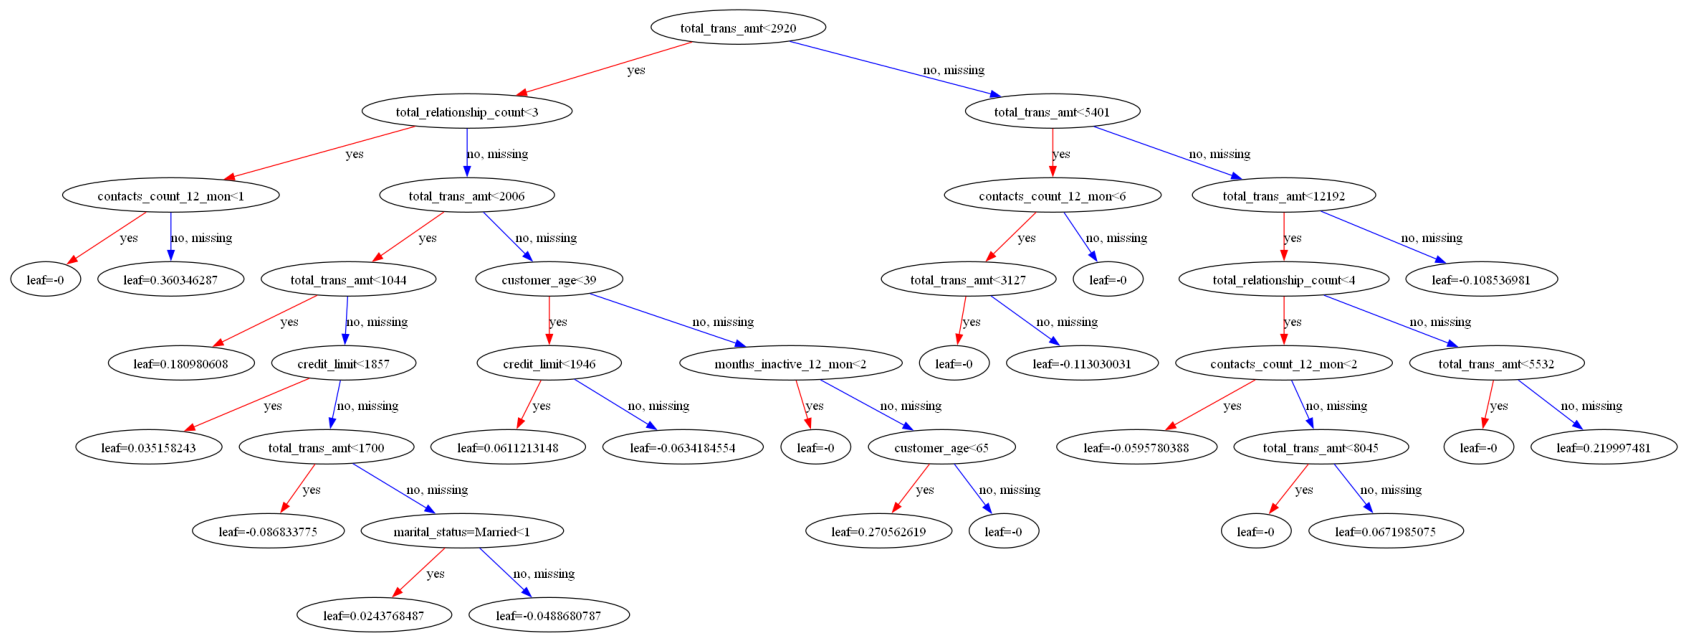

In [90]:
_, ax = plt.subplots(figsize=(30,30))
plot_tree(model, fontsize=10, ax=ax)
plt.show()

In [93]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    'alpha': 10,
    'lambda': 10,
    'gamma': 10,
    
    'objective': 'binary:logistic',
    'nthread': 3,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.cv(xgb_params, 
               dfulltrain,
               num_boost_round=100,
               verbose_eval=10,
               nfold=100,
               metrics="auc",)

[0]	train-auc:0.91876+0.00378	test-auc:0.91248+0.04998
[10]	train-auc:0.94134+0.00125	test-auc:0.93272+0.04399
[20]	train-auc:0.95316+0.00059	test-auc:0.94473+0.03788
[30]	train-auc:0.95670+0.00049	test-auc:0.94917+0.03543
[40]	train-auc:0.95875+0.00044	test-auc:0.95084+0.03526
[50]	train-auc:0.95883+0.00045	test-auc:0.95103+0.03495
[60]	train-auc:0.95883+0.00045	test-auc:0.95103+0.03495
[70]	train-auc:0.95883+0.00045	test-auc:0.95103+0.03495
[80]	train-auc:0.95883+0.00045	test-auc:0.95103+0.03495
[90]	train-auc:0.95883+0.00045	test-auc:0.95103+0.03495
[99]	train-auc:0.95883+0.00045	test-auc:0.95103+0.03495


In [94]:
f"{model['test-auc-mean'].mean():.3f}"

'0.947'

### Test Pickle File

In [95]:
input_file = 'model_eta=0.1_max_depth=6_v0.947.bin'

with open(input_file, 'rb') as f_in: 
    dv, model, features = pickle.load(f_in)

C:\Users\d.takeshi\Anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [08:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [96]:
info_churn = {
'customer_age': 43,
'gender':'F',
'dependent_count':  2,
'education_level':   'Graduate',
'marital_status':     'Married',
'income_category':     'Less than $40K',
'card_category':       'Silver',
'months_on_book':  25,
'total_relationship_count': 6,
'months_inactive_12_mon':   2,
'contacts_count_12_mon':    4,
'credit_limit':       10388.0,
'total_revolving_bal':   1961,
'total_amt_chng_q4_q1': 0.703,
'total_trans_amt':              10294,
}

In [102]:
X = dv.transform([info_churn])
dX = xgb.DMatrix(X, feature_names=features)
y_pred = model.predict(dX)
if y_pred[0] > 0.5:
    print(f'Customer has a potential of Churn with {y_pred[0]:.3f} %')
else:
    print(f'Customer will not churn')

Customer has a potential of Churn with 0.548 %


In [103]:
info_no_churn = {
"customer_age":45,
"gender":"M",
"dependent_count":3,
"education_level":"High School",
"marital_status":"Married",
"income_category":"$60K - $80K",
"card_category":"Blue",
"months_on_book":39,
"total_relationship_count":5,
"months_inactive_12_mon":1,
"contacts_count_12_mon":3,
"credit_limit":12691.0,
"total_revolving_bal":777,
"total_amt_chng_q4_q1":1.335,
"total_trans_amt":1144,
}

In [104]:
X = dv.transform([info_no_churn])
dX = xgb.DMatrix(X, feature_names=features)
y_pred = model.predict(dX)
if y_pred[0] > 0.5:
    print(f'Customer has a potential of Churn with {y_pred[0]}%')
else:
    print(f'Customer will not churn')

Customer will not churn


### Test Container

In [105]:
test_churn = [
    {
    "customer_age":62,
    "gender":"F",
    "dependent_count":0,
    "education_level":"Graduate",
    "marital_status":"Married",
    "income_category":"Less than $40K",
    "card_category":"Blue",
    "months_on_book":49,
    "total_relationship_count":2,
    "months_inactive_12_mon":3,
    "contacts_count_12_mon":3,
    "credit_limit":1438.3,
    "total_revolving_bal":0,
    "total_amt_chng_q4_q1":1.047,
    "total_trans_amt":692
    },

    {
    "customer_age":54,
    "gender":"F",
    "dependent_count":1,
    "education_level":"Graduate",
    "marital_status":"Married",
    "income_category":"Less than $40K",
    "card_category":"Blue",
    "months_on_book":40,
    "total_relationship_count":2,
    "months_inactive_12_mon":3,
    "contacts_count_12_mon":1,
    "credit_limit":1438.3,
    "total_revolving_bal":808,
    "total_amt_chng_q4_q1":0.997,
    "total_trans_amt":705
    },

    {
    "customer_age":56,
    "gender":"M",
    "dependent_count":2,
    "education_level":"Graduate",
    "marital_status":"Married",
    "income_category":"$120K +",
    "card_category":"Blue",
    "months_on_book":36,
    "total_relationship_count":1,
    "months_inactive_12_mon":3,
    "contacts_count_12_mon":3,
    "credit_limit":15769.0,
    "total_revolving_bal":0,
    "total_amt_chng_q4_q1":1.041,
    "total_trans_amt":602
    },

    {
    "customer_age":48,
    "gender":"M",
    "dependent_count":2,
    "education_level":"Graduate",
    "marital_status":"Married",
    "income_category":"$60K - $80K",
    "card_category":"Silver",
    "months_on_book":35,
    "total_relationship_count":2,
    "months_inactive_12_mon":4,
    "contacts_count_12_mon":4,
    "credit_limit":34516.0,
    "total_revolving_bal":0,
    "total_amt_chng_q4_q1":0.763,
    "total_trans_amt":691
    }
]

In [106]:
test_churn[1]

{'customer_age': 54,
 'gender': 'F',
 'dependent_count': 1,
 'education_level': 'Graduate',
 'marital_status': 'Married',
 'income_category': 'Less than $40K',
 'card_category': 'Blue',
 'months_on_book': 40,
 'total_relationship_count': 2,
 'months_inactive_12_mon': 3,
 'contacts_count_12_mon': 1,
 'credit_limit': 1438.3,
 'total_revolving_bal': 808,
 'total_amt_chng_q4_q1': 0.997,
 'total_trans_amt': 705}

In [108]:
for t in test_churn:
    X = dv.transform([t])
    dX = xgb.DMatrix(X, feature_names=features)
    y_pred = model.predict(dX)
    print(f' {y_pred}')

 [0.8916798]
 [0.8260018]
 [0.8993829]
 [0.8993829]


In [109]:
test_no_churn = [
    {
    "customer_age":45,
    "gender":"M",
    "dependent_count":3,
    "education_level":"High School",
    "marital_status":"Married",
    "income_category":"$60K - $80K",
    "card_category":"Blue",
    "months_on_book":39,
    "total_relationship_count":5,
    "months_inactive_12_mon":1,
    "contacts_count_12_mon":3,
    "credit_limit":12691.0,
    "total_revolving_bal":777,
    "total_amt_chng_q4_q1":1.335,
    "total_trans_amt":1144
    },

    {
    "customer_age":49,
    "gender":"F",
    "dependent_count":5,
    "education_level":"Graduate",
    "marital_status":"Single",
    "income_category":"Less than $40K",
    "card_category":"Blue",
    "months_on_book":44,
    "total_relationship_count":6,
    "months_inactive_12_mon":1,
    "contacts_count_12_mon":2,
    "credit_limit":8256.0,
    "total_revolving_bal":864,
    "total_amt_chng_q4_q1":1.541,
    "total_trans_amt":1291
    },

    {
    "customer_age":51,
    "gender":"M",
    "dependent_count":3,
    "education_level":"Graduate",
    "marital_status":"Married",
    "income_category":"$80K - $120K",
    "card_category":"Blue",
    "months_on_book":36,
    "total_relationship_count":4,
    "months_inactive_12_mon":1,
    "contacts_count_12_mon":0,
    "credit_limit":3418.0,
    "total_revolving_bal":0,
    "total_amt_chng_q4_q1":2.594,
    "total_trans_amt":1887
    },

    {
    "customer_age":40,
    "gender":"F",
    "dependent_count":4,
    "education_level":"High School",
    "marital_status":"Unknown",
    "income_category":"Less than $40K",
    "card_category":"Blue",
    "months_on_book":34,
    "total_relationship_count":3,
    "months_inactive_12_mon":4,
    "contacts_count_12_mon":1,
    "credit_limit":3313.0,
    "total_revolving_bal":2517,
    "total_amt_chng_q4_q1":1.405,
    "total_trans_amt":1171
    }
]

In [110]:
for enum, test_case in enumerate(test_no_churn):
    print(f"Response {enum}: {test_case}")

Response 0: {'customer_age': 45, 'gender': 'M', 'dependent_count': 3, 'education_level': 'High School', 'marital_status': 'Married', 'income_category': '$60K - $80K', 'card_category': 'Blue', 'months_on_book': 39, 'total_relationship_count': 5, 'months_inactive_12_mon': 1, 'contacts_count_12_mon': 3, 'credit_limit': 12691.0, 'total_revolving_bal': 777, 'total_amt_chng_q4_q1': 1.335, 'total_trans_amt': 1144}
Response 1: {'customer_age': 49, 'gender': 'F', 'dependent_count': 5, 'education_level': 'Graduate', 'marital_status': 'Single', 'income_category': 'Less than $40K', 'card_category': 'Blue', 'months_on_book': 44, 'total_relationship_count': 6, 'months_inactive_12_mon': 1, 'contacts_count_12_mon': 2, 'credit_limit': 8256.0, 'total_revolving_bal': 864, 'total_amt_chng_q4_q1': 1.541, 'total_trans_amt': 1291}
Response 2: {'customer_age': 51, 'gender': 'M', 'dependent_count': 3, 'education_level': 'Graduate', 'marital_status': 'Married', 'income_category': '$80K - $120K', 'card_category'

In [113]:
# Test Local
url = 'http://0.0.0.0:9696/predict'

In [115]:
# Test Cloud Deployment
url = 'https://churn-prob-234gh2nz6a-rj.a.run.app/predict'

In [119]:
print("=========================== CHURNING CUSTOMERS TEST ===========================")
for enum, test_case in enumerate(test_churn):
    answer = requests.post(url, json=test_case).json()
    print(f"Response {enum}: churn_flag: {answer['churn_flag']}, churn_probability: {answer['churn_probability']:.2f}")
print()
print("=========================== NON CHURNING CUSTOMERS TEST ===========================")
for enum, test_case in enumerate(test_no_churn):
    answer = requests.post(url, json=test_case).json()
    print(f"Response {enum}: churn_flag: {answer['churn_flag']}, churn_probability: {answer['churn_probability']:.2f}")

=========================== CHURNING CUSTOMERS TEST ===========================
Response 0: churn_flag: True, churn_probability: 0.90
Response 1: churn_flag: True, churn_probability: 0.80
Response 2: churn_flag: True, churn_probability: 0.90
Response 3: churn_flag: True, churn_probability: 0.90

=========================== NON CHURNING CUSTOMERS TEST ===========================
Response 0: churn_flag: False, churn_probability: 0.10
Response 1: churn_flag: False, churn_probability: 0.10
Response 2: churn_flag: False, churn_probability: 0.10
Response 3: churn_flag: False, churn_probability: 0.10


### CMD commands

1. Build and Run Docker container

- docker build -t churn-pred .
- docker run -it --rm -p 9696:9696 churn-pred

2. Cloud Run Deployment

- gcloud run deploy churn-prob --port=9696 --source .

3. Run Streamlit app

- streamlit run myapp.py "https://churn-prob-234gh2nz6a-rj.a.run.app"

4. Run Prediction Test Script

- python predict-test.py "https://churn-prob-234gh2nz6a-rj.a.run.app"

5. Enter Docker Container

- docker ps
- docker exec -it churn-pred bash